 * Generate 40k linspaced dataset, save in 'dataset-linspace-40k.pickle'

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
# spawn gym environment
from env import ArmRobotEnv
env = ArmRobotEnv()

## Implementation of a linspaced dataset generator

In [14]:
import time

def gen_data2(a1s, a2s):
    """
    Generate testdata: actions and robot views
    """
    env.reset()

    assert(len(a1s.shape) == len(a2s.shape) == 1)
    N = a1s.shape[0] * a2s.shape[0]
    estimated_time = N * 0.035
    print("Generating %d datapoints ... (approx %f sec)" % (N, estimated_time))

    A, Y = [], []
    
    start_time = time.time()
    for a1 in a2s:
        for a2 in a2s:
            action = np.array([a1, a2])
            obs, _reward, _done, _info = env.step(action)
            env.render()
            y = env.get_image()

            if i == 0:
                A = np.zeros([nrows, ncols] + list(action.shape))
                Y = np.zeros([nrows, ncols] + list(y.shape))

            A.append(action.flatten())
            Y.append(y)
  
    elapsed = time.time() - start_time
    print("Generated %d data points. Actual time: %.1fs (%f sec/datapoint)" % (N, elapsed, elapsed/N))

    return {'A': np.array(A), 'Y': np.array(Y)}

In [ ]:
#a_space = np.linspace(-1., 1., 20)
#data = gen_data2(a_space, a_space)

### Implementations of save_dataset() and load_dataset()

In [35]:
import pickle

def load_dataset(filename):
    with open(filename, 'rb') as handle:
        return pickle.load(handle)

def save_dataset(dataset, filename):
    # https://betterprogramming.pub/load-fast-load-big-with-compressed-pickles-5f311584507e
    with open(filename, 'wb') as handle:
        pickle.dump(dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("Dataset saved in %s" % filename)

In [ ]:
#save_dataset([train, test, val], 'dataset-random-100k.mdict.pickle')

### Implementation of dataset visualization

In [59]:
def visualize(data, N=3, M=6):
    """
    Plot NxM array of plots
    """
    
    assert(data['Y'].shape[0] >= N*M)

    fig, axs = plt.subplots(N, M, figsize=(12, 6))
    fig.tight_layout()
    col_map = plt.get_cmap('Greys')

    for i in range(N):
        for j in range(M):
            k = i*N+j
            
            img_array = data['Y'][k]
            assert((len(img_array.shape) == 3) and img_array.shape[2] == 1) ## (D, D, C=1)
            axs[i][j].title.set_text("%.2f %.2f" % (data['A'][k,0], data['A'][k,1]))
            last_im = axs[i][j].imshow(img_array[...,0], cmap=col_map, origin='lower')

    # https://stackoverflow.com/questions/13784201/matplotlib-2-subplots-1-colorbar
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    _ = fig.colorbar(last_im, cax=cbar_ax)

In [ ]:
def test_grid():
    
    a_large_spaced = np.linspace(-1., 1., 5)
    a_small_spaced = np.linspace(-1., 1., 50)
    
    for a1 in a_large_spaced:
        for a2 in a_small_spaced:
        
    data = gen_grid_dataset(a_space, a_space)
    plt.scatter(data['A'][:,0], data['A'][:,1], 1)
    visualize(data, 5, 5)
    
test_linspace()

## Generate 25 datapoints, to check the result visually

Generating 25 datapoints ... (approx 0.875000 sec)
Generated 25 data points. Actual time: 0.8s (0.031756 sec/datapoint)


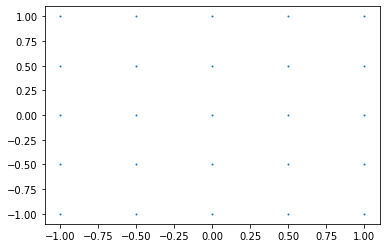

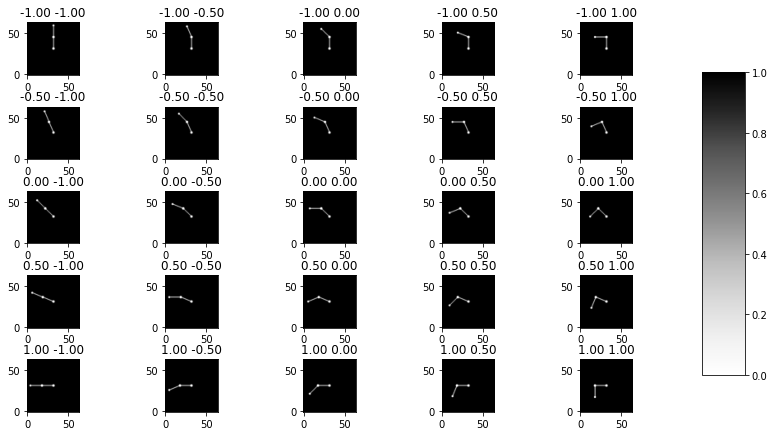

In [61]:
def test_linspace():
    a_space = np.linspace(-1., 1., 5)
    data = gen_data2(a_space, a_space)
    plt.scatter(data['A'][:,0], data['A'][:,1], 1)
    visualize(data, 5, 5)
    
test_linspace()

## Generate 40k datapoints and save dataset in 'dataset-linspace-40k.pickle'

In [64]:
a_space = np.linspace(-1., 1., 200)
data = gen_data2(a_space, a_space)

Generating 40000 datapoints ... (approx 1400.000000 sec)
Generated 40000 data points. Actual time: 1235.2s (0.030879 sec/datapoint)


In [65]:
save_dataset(data, 'dataset-linspace-40k.pickle')

Dataset saved in dataset-linspace-40k.pickle


In [66]:
data = load_dataset('dataset-linspace-40k.pickle')

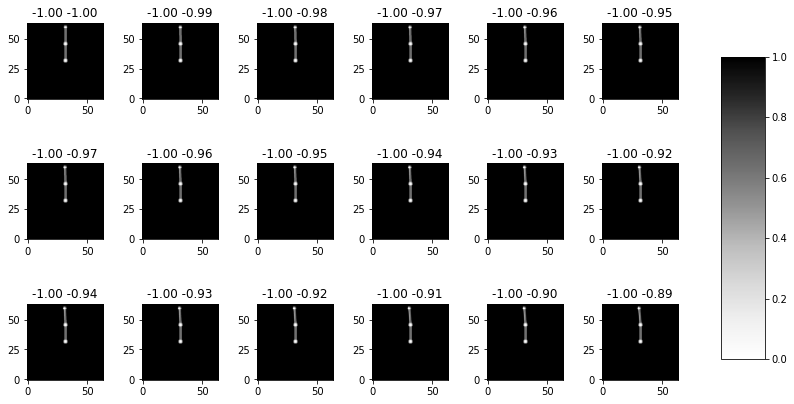

In [67]:
visualize(data) # Note: little visual changes